In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

p = "Software_5.json.gz"

df = pd.read_json(p, lines=True, compression="gzip")

print(df.shape)
print(df.columns.tolist())
print(df.head)

(12805, 12)
['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image']
<bound method NDFrame.head of        overall  verified   reviewTime      reviewerID        asin  \
0            4     False  10 20, 2010  A38NELQT98S4H8  0321719816   
1            4     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816   
2            5     False  10 16, 2010   ACJT8MUC0LRF0  0321719816   
3            5     False  10 12, 2010   AYUF7YETYOLNX  0321719816   
4            5     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816   
...        ...       ...          ...             ...         ...   
12800        4     False  07 16, 2016  A1E50L7PCVXLN4  B01FFVDY9M   
12801        3     False  06 17, 2017   AVU1ILDDYW301  B01HAP3NUG   
12802        4     False  01 24, 2017  A2LW5AL0KQ9P1M  B01HAP3NUG   
12803        3     False  06 14, 2018   AZ515FFZ7I2P7  B01HAP47PQ   
12804        4     False  04 16, 2018  A2WPL6Y08K6ZQH 

In [2]:
print(df.isna().sum())

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              5644
reviewerName          9
reviewText            1
summary               6
unixReviewTime        0
vote               8903
image             12734
dtype: int64


In [3]:
# Drop image and style column because there are too many missing values
df = df.drop(columns=['image','style'], errors='ignore')

# The missing values in our vote variable will be filled with 0
df['vote'] = pd.to_numeric(df['vote'].astype(str).str.replace(',', ''), errors='coerce').fillna(0).astype(int)

print(df.columns.tolist())
print(df.isna().sum())

['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote']
overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      9
reviewText        1
summary           6
unixReviewTime    0
vote              0
dtype: int64


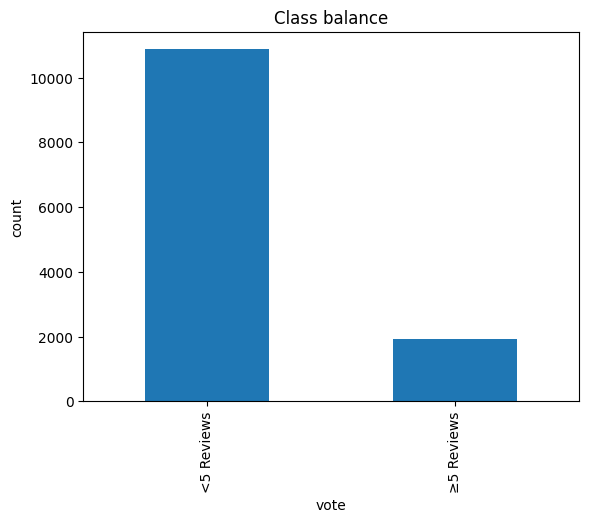

In [4]:
# Bar Graph to show how many >5 reviews there are vs. how many <5 reviews there are
y = (df['vote'] >= 5).astype(int)

y.value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1], ['<5 Reviews','≥5 Reviews']); plt.ylabel('count'); plt.title('Class balance')
plt.show()

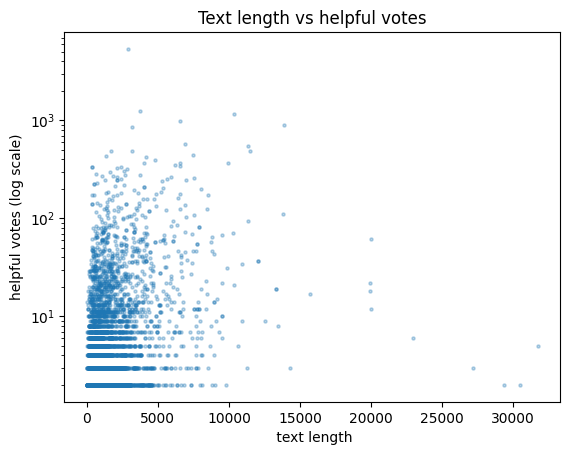

In [5]:
# Scatterplot to show relationship if number of characters in t heir review affect the review 
df['text_len'] = (df['summary'].fillna('') + ' ' + df['reviewText'].fillna('')).str.len()
plt.scatter(df['text_len'], df['vote'], s=5, alpha=0.3)
plt.yscale('log'); plt.xlabel(' text length'); plt.ylabel('helpful votes (log scale)')
plt.title('Text length vs helpful votes')
plt.show()